# IMPORTING NECESSARY LIBRARIES

In [190]:
# Import necessary libraries
import numpy as np              # For numerical operations
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For plotting charts
import seaborn as sns           # For advanced data visualization
import warnings                 # To suppress warning messages

# Suppress warning messages
warnings.filterwarnings('ignore')

# LOADING THE DATASET

In [191]:
df = pd.read_csv("diabetes.csv")

# EXPLORATORY DATA ANALYSIS

In [192]:
# Display the top 5 data records to get familiar with the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [193]:
# Get the dimensions of the DataFrame (rows, columns)
df_shape = df.shape
print("DataFrame shape:", df_shape)

DataFrame shape: (768, 9)


In [194]:
# Display the column names of the DataFrame
print("Column names:", df.columns)

Column names: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [195]:
# Display the data types of each column
print("Data types:")
print(df.dtypes)

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [196]:
# Generate descriptive statistics of the DataFrame
print("Descriptive statistics:")
df.describe()

Descriptive statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# CONCLUSION

Our examination of the dataset has revealed instances where the minimum values in certain columns are recorded as 0, a scenario that lacks medical plausibility.  Consequently, as part of the data cleansing endeavor, it becomes imperative to address this anomaly by substituting such zero values with either the median or mean, contingent upon the distribution characteristics of the data. 

Moreover, upon closer scrutiny, we have identified outliers, notably in the case of insulin levels, where values soar as high as 846. Addressing these outliers is crucial to ensuring the integrity of our analysis and the reliability of our findings. 

Hence, an appropriate treatment strategy must be employed to manage these outliers effectively.

# DATA CLEANING


In our analysis, it has come to our attention that certain columns within the dataset contain minimum values of 0. Medically speaking, such occurrences are highly improbable and suggest potential data anomalies or missing information. As we embark on the data cleansing process, it is essential to rectify these discrepancies by substituting the zero values with either the median or mean, depending on the underlying distribution of the data. This corrective action ensures that our dataset aligns more closely with medical norms and enhances the accuracy of subsequent analyses.

Additionally, upon closer examination, we have identified outliers in our dataset, notably in the context of insulin levels. These outliers manifest as unusually high values, with some insulin levels reaching as high as 846. Outliers of this magnitude can significantly skew statistical analyses and distort the interpretation of results. Therefore, it is imperative to employ appropriate outlier treatment methods to mitigate their influence and ensure the robustness of our analytical insights. By addressing these outliers effectively, we can enhance the reliability and validity of our findings, facilitating more informed decision-making processes.

In [197]:
# Dropping duplicate values - check for any duplicate rows and drop them if found
df = df.drop_duplicates()

In [198]:
# Check for missing values, count them, and print the sum for every column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print("Conclusion: There are no null values in this dataset")

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Conclusion: There are no null values in this dataset


In [199]:
# Checking for 0 values in specific columns
# Age & DiabetesPedigreeFunction do not have a minimum value of 0, so no need to replace
# Also, the number of pregnancies as 0 is possible as observed in df.describe
print("Count of Zero values:")
print("BloodPressure:", df[df['BloodPressure']==0].shape[0])
print("Glucose:", df[df['Glucose']==0].shape[0])
print("SkinThickness:", df[df['SkinThickness']==0].shape[0])
print("Insulin:", df[df['Insulin']==0].shape[0])
print("BMI:", df[df['BMI']==0].shape[0])

# Replacing 0 values with the median of each column
# Glucose and BloodPressure have normal distributions
# SkinThickness, Insulin, and BMI have skewed distributions
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

Count of Zero values:
BloodPressure: 35
Glucose: 5
SkinThickness: 227
Insulin: 374
BMI: 11


# NOTE : 
In our dataset, some columns exhibit a skewed distribution, which means that the distribution of data points is not symmetrical and is instead skewed towards one end. In such cases, the mean, which represents the average value, can be heavily influenced by outliers, as it takes into account the magnitude of each data point. Outliers are extreme values that deviate significantly from the rest of the data and can distort the mean.

For columns with a skewed distribution, using the median as a measure of central tendency is often more appropriate. The median is the middle value of a dataset when arranged in ascending order. Unlike the mean, it is not influenced by extreme values or outliers, making it a more robust measure of central tendency in skewed distributions.

For columns like Glucose and Blood Pressure, which exhibit normal distributions, the data is roughly symmetrically distributed around the mean, and outliers have less impact. Therefore, replacing missing or zero values in these columns with the mean value is reasonable.

On the other hand, columns like SkinThickness, Insulin, and BMI have skewed distributions, where the presence of outliers can significantly affect the mean. In these cases, replacing missing or zero values with the median provides a more accurate representation of the central tendency of the data, as the median is less affected by extreme values.

Histograms are often used to visualize the distribution of data in a column. They provide insights into the shape of the distribution, including whether it is symmetric or skewed, and the presence of outliers.

By considering the distribution of data and the characteristics of each column, we can make informed decisions about the most appropriate method for handling missing or zero values, ensuring the integrity and accuracy of our analyses.


# 4. Data Visualization

These plots serve as invaluable tools in exploratory data analysis (EDA), enabling analysts to delve deeply into the dataset and uncover meaningful insights. Here's a breakdown of each plot type and its significance:

1. Count Plot:

A count plot provides a visual representation of the frequency of observations in each category of a categorical variable.
It aids in understanding the distribution of categorical data and identifying any imbalances or disparities among different categories.

2. Histograms:

Histograms offer a graphical depiction of the distribution of numerical data by dividing it into bins and displaying the frequency of observations within each bin.
They are instrumental in discerning the shape of the distribution, whether it adheres to a symmetric (normal distribution) or skewed pattern.

3. Box Plot:

A box plot, also called a box-and-whisker plot, offers a concise summary of the distribution of numerical data.
It showcases key statistics such as the median, quartiles, and potential outliers, providing insights into the spread and variability of the data.

4. Scatter Plots:

Scatter plots visualize the relationship between two continuous variables by plotting individual data points on a two-dimensional plane.
They are adept at revealing patterns, trends, and correlations between variables, making them indispensable for uncovering relationships within the data.

5. Pair Plot:

A pair plot, or scatter plot matrix, presents a grid of scatter plots illustrating the relationships between pairs of variables in the dataset.
It furnishes a comprehensive overview of the interrelationships among all variables, making it particularly valuable for identifying patterns and correlations in multivariate datasets.

These plots collectively empower analysts to gain profound insights into the distribution, relationships, and characteristics of the data. By facilitating the identification of patterns, trends, and correlations, they pave the way for informed decision-making and further analysis. Through exploratory data analysis, analysts can extract valuable insights that lay the foundation for subsequent modeling and interpretation tasks.

<Axes: xlabel='Outcome', ylabel='count'>

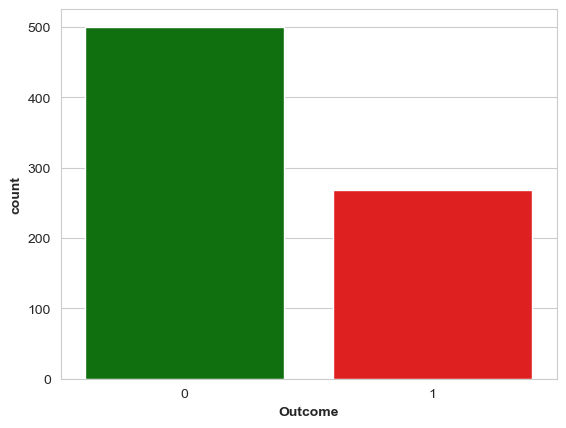

In [200]:
# Define the color palette for the count plot
color_palette = {0: "green", 1: "red"}

# Count Plot to visualize the distribution of the 'Outcome' variable
sns.countplot(x='Outcome', data=df, palette=color_palette)


### What insights can we derive from this plot?

The disparity between the number of individuals without diabetes compared to those diagnosed with the condition hints at an imbalance in our dataset. This imbalance signifies an uneven distribution of samples across the two categories of the target variable.

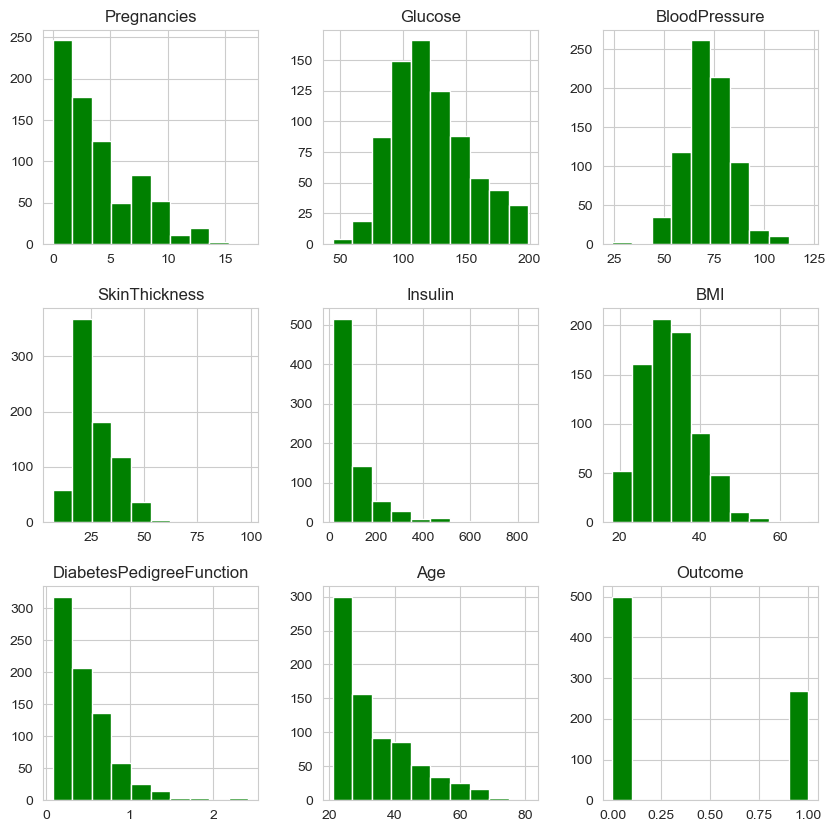

In [201]:
# Histogram for each feature
df.hist(bins=10, figsize=(10, 10), color='green')  # Adjust the color as per your preference
plt.show()

### What insights can we derive from this plot?

Our analysis reveals that only glucose and blood pressure distributions conform to a normal distribution pattern, while the distributions of other features exhibit skewness and contain outliers. This suggests that the data points are not evenly distributed across these variables and may require special consideration in subsequent analyses and modeling processes.

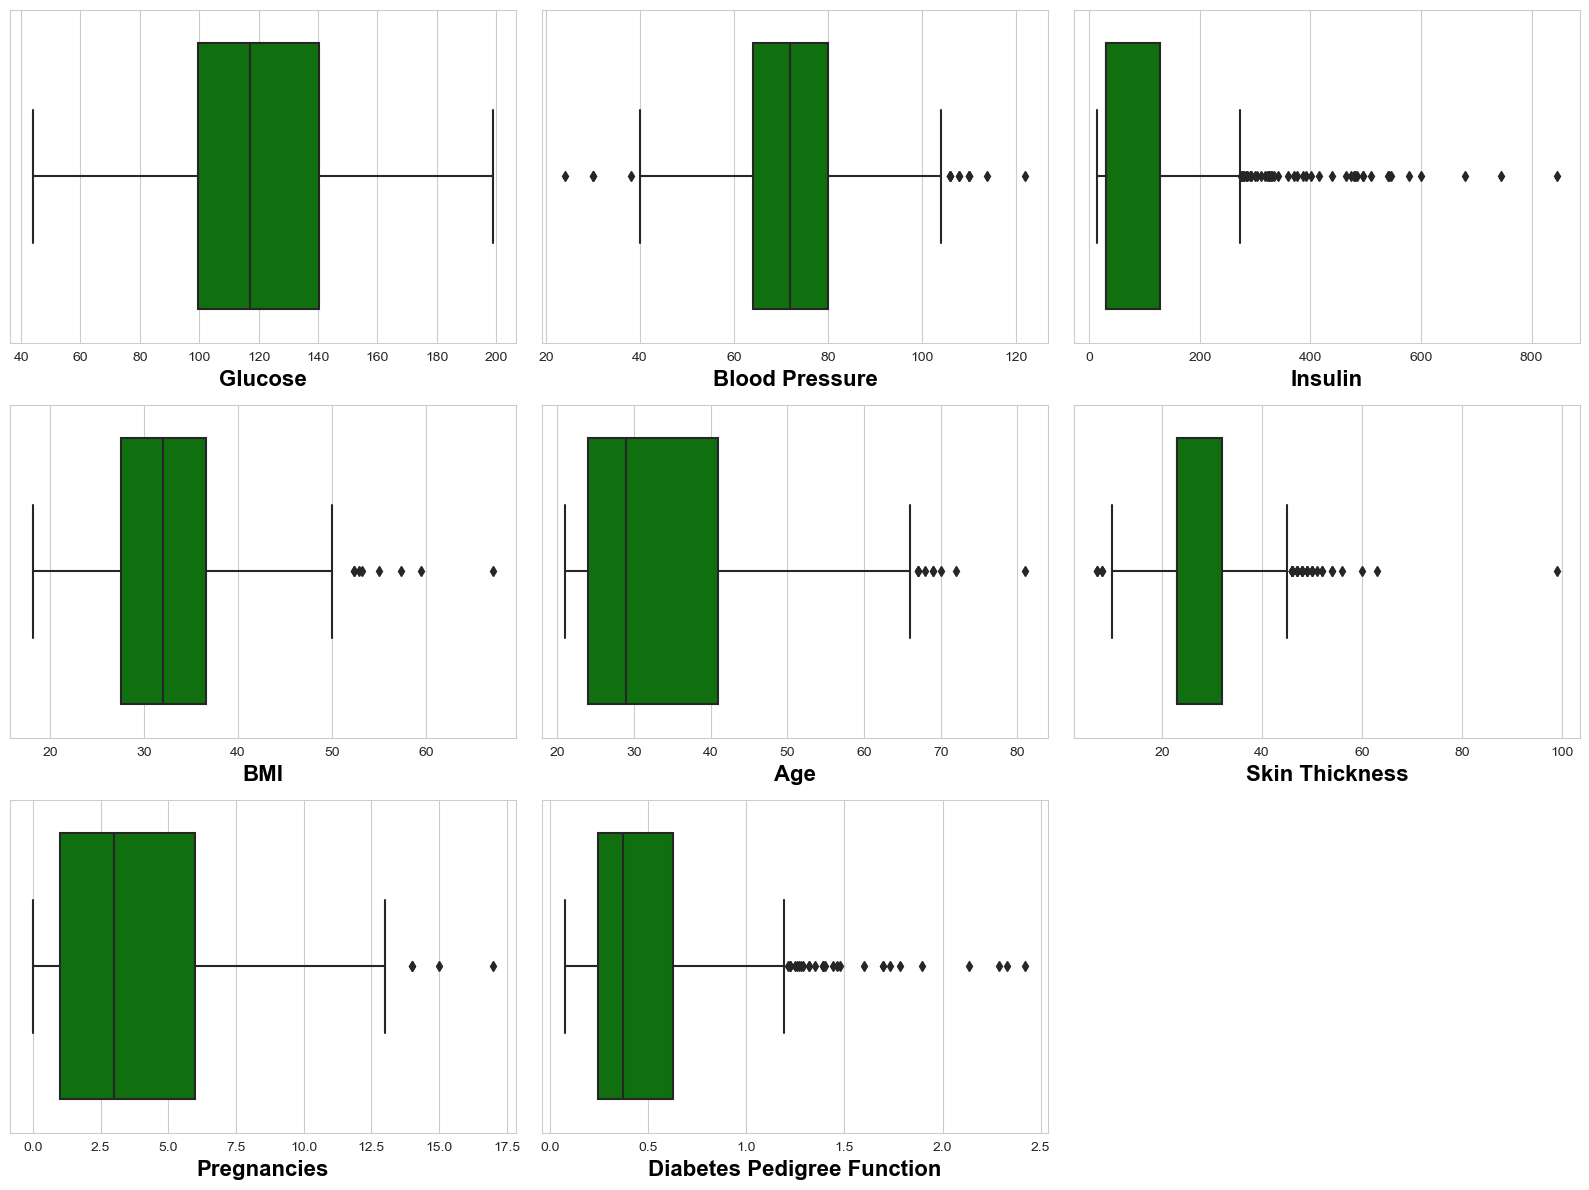

In [202]:
# Box plots for analyzing the distribution and identifying outliers
plt.figure(figsize=(16, 12))
sns.set_style(style='whitegrid')

plt.subplot(3, 3, 1)
sns.boxplot(x='Glucose', data=df, color='green')
plt.xlabel('Glucose', fontsize=16, fontweight='bold', color='black')

plt.subplot(3, 3, 2)
sns.boxplot(x='BloodPressure', data=df, color='green')
plt.xlabel('Blood Pressure', fontsize=16, fontweight='bold', color='black')

plt.subplot(3, 3, 3)
sns.boxplot(x='Insulin', data=df, color='green')
plt.xlabel('Insulin', fontsize=16, fontweight='bold', color='black')

plt.subplot(3, 3, 4)
sns.boxplot(x='BMI', data=df, color='green')
plt.xlabel('BMI', fontsize=16, fontweight='bold', color='black')

plt.subplot(3, 3, 5)
sns.boxplot(x='Age', data=df, color='green')
plt.xlabel('Age', fontsize=16, fontweight='bold', color='black')

plt.subplot(3, 3, 6)
sns.boxplot(x='SkinThickness', data=df, color='green')
plt.xlabel('Skin Thickness', fontsize=16, fontweight='bold', color='black')

plt.subplot(3, 3, 7)
sns.boxplot(x='Pregnancies', data=df, color='green')
plt.xlabel('Pregnancies', fontsize=16, fontweight='bold', color='black')

plt.subplot(3, 3, 8)
sns.boxplot(x='DiabetesPedigreeFunction', data=df, color='green')
plt.xlabel('Diabetes Pedigree Function', fontsize=16, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

### What insights can we derive from this plot?

Outliers, which are data points that significantly deviate from the majority of the dataset, have the potential to skew statistical analyses and undermine their reliability. Consequently, it's essential to handle outliers appropriately to ensure accurate and meaningful interpretations of the data. Simply removing outliers can lead to loss of important information and may not always be the best approach. Instead, employing various techniques such as data scaling and transformation allows us to mitigate the impact of outliers while retaining the integrity of the dataset. This ensures that our analyses are robust and reflective of the underlying patterns and trends in the data.

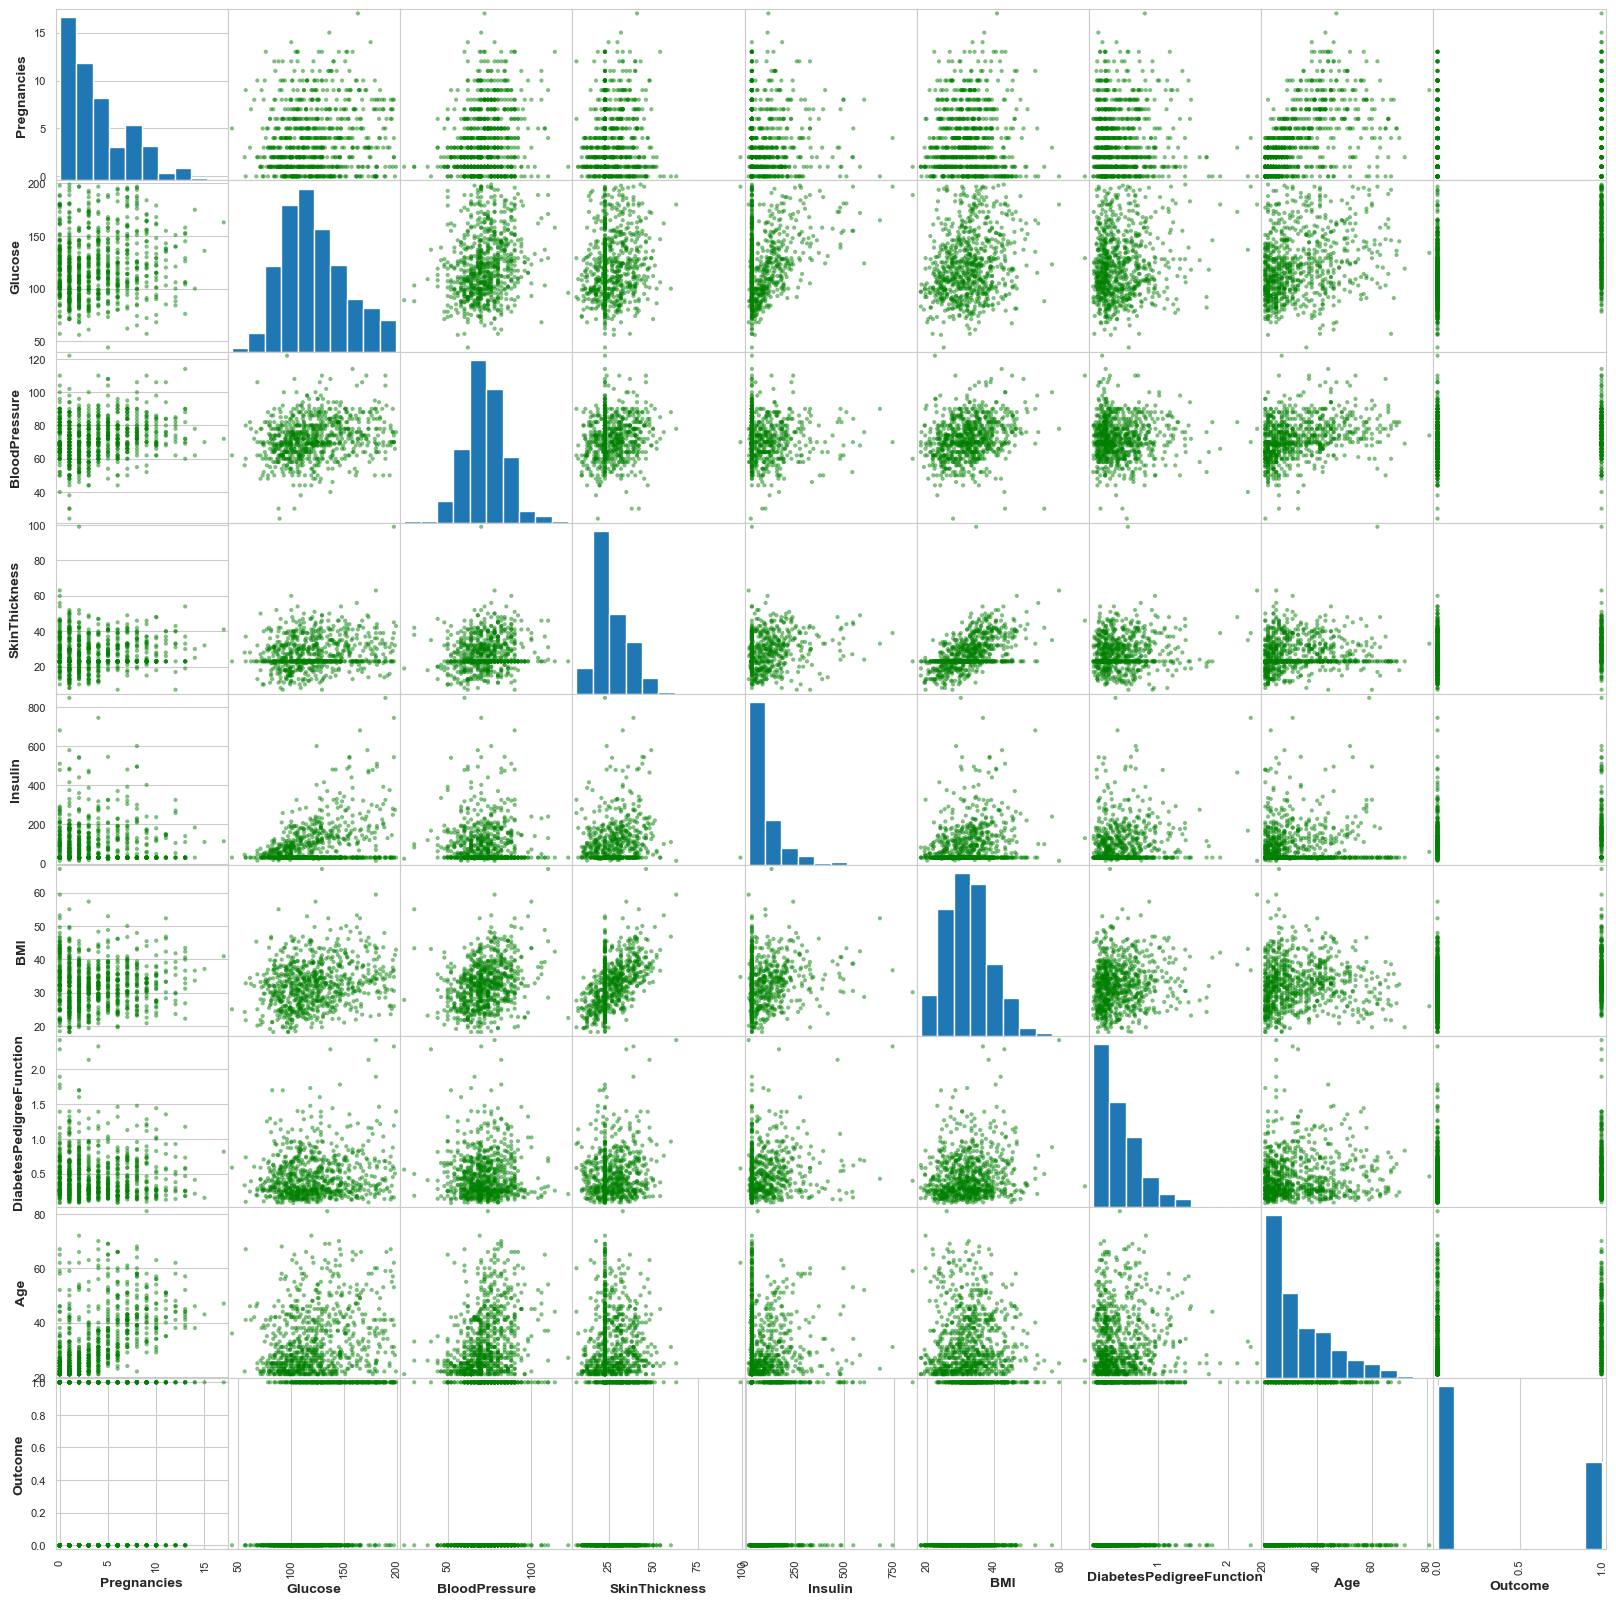

In [203]:
from pandas.plotting import scatter_matrix

# Creating a scatter matrix to visualize relationships between variables
# The scatter matrix displays pairwise scatter plots for each pair of variables in the DataFrame 'df'
# figsize=(20, 20) sets the size of the figure to be 20 inches in width and 20 inches in height

scatter_matrix(df, figsize=(20, 20), color='green')

# Set the color of scatter plot labels to black and make them bold
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.labelweight'] = 'bold'

We can draw various conclusions by examining these plots. For instance, in the 5th plot, which depicts pregnancies against insulin levels, it appears that women with a higher number of pregnancies tend to have lower insulin levels.

# FEATURE SELECTION

### Pearson's Correlation Coefficient 
is a statistical measure used to quantify the strength and direction of the linear relationship between two variables. It calculates the degree to which the variables tend to move together. The coefficient ranges from -1 to +1, where:

A value of +1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other variable also increases proportionally.

A value of -1 indicates a perfect negative linear relationship, meaning that as one variable increases, the other variable decreases proportionally.

A value of 0 indicates no linear relationship between the variables.
The correlation coefficient is a valuable tool for understanding the association between variables in a dataset.

### Heat Map 
is a graphical representation of data where values are depicted using colors. It provides a visual summary of complex data by representing each data point with a color based on its value. Heat maps are particularly useful for visualizing patterns, trends, and relationships in large datasets, especially those with multiple variables. They allow users to quickly identify areas of interest or concentration within the data.

<Axes: >

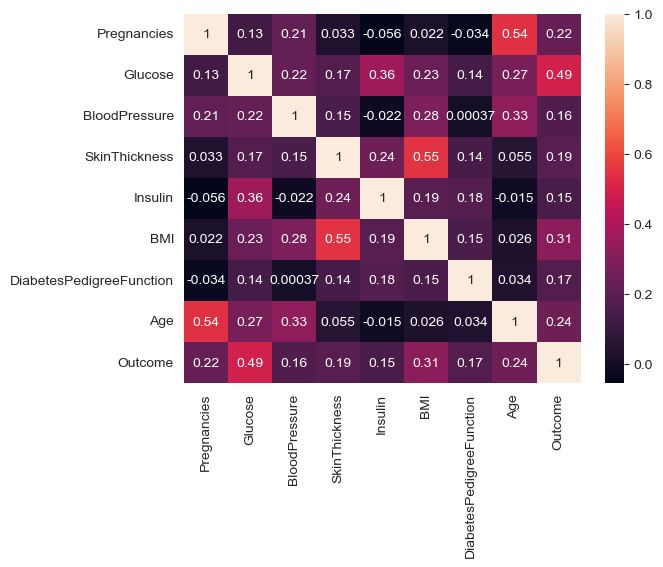

In [204]:
# Compute the correlation matrix of the DataFrame 'df'
corrmat = df.corr()

# Generate a heatmap to visualize the correlation matrix
# annot=True displays the correlation values on the heatmap
sns.heatmap(corrmat, annot=True)

###### Examining the correlation scores with the 'Outcome' variable, note that Glucose, BMI, and Age exhibit the highest correlation coefficients. Conversely, BloodPressure, Insulin, and DiabetesPedigreeFunction demonstrate lower correlations with Outcome, suggesting they may have less impact on the predictive model and could be considered for removal. 

In [205]:
# Drop columns 'BloodPressure', 'Insulin', and 'DiabetesPedigreeFunction' from the dataframe
df_selected = df.drop(['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction'], axis='columns')

# HANDLING OUTLIERS

An outlier refers to a data point within a dataset that significantly deviates from the rest of the observations.

Outliers can be identified using various methods such as box plots, scatter plots, and Z-scores. In this project, box plots were used during the data visualization step to detect outliers.

The treatment of outliers involves using the Quantile Transformer method. This technique transforms the features of a dataset to follow either a uniform or a normal distribution. As a result, it spreads out the most frequent values and diminishes the impact of marginal outliers.

In [206]:
from sklearn.preprocessing import QuantileTransformer
x = df_selected
quantile = QuantileTransformer()

# Transforming the features of the DataFrame using the QuantileTransformer
X = quantile.fit_transform(x)

df_new = quantile.transform(X)
df_new = pd.DataFrame(X)
df_new.columns = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age', 'Outcome']

# Display the top 5 data records of the dataset
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


Text(0.5, 0, 'Skin Thickness')

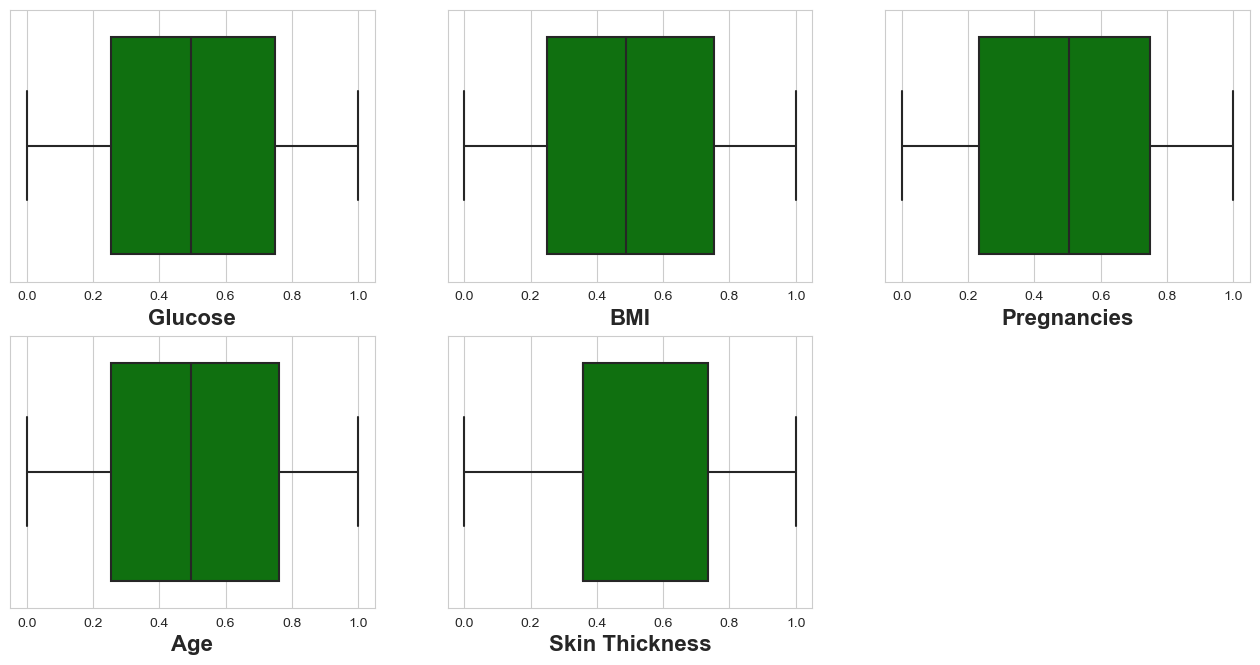

In [207]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')

# Box plot for Glucose
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'], data=df_new, color='green')
plt.xlabel('Glucose', fontsize=16)

# Box plot for BMI
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'], data=df_new, color='green')
plt.xlabel('BMI', fontsize=16)

# Box plot for Pregnancies
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'], data=df_new, color='green')
plt.xlabel('Pregnancies', fontsize=16)

# Box plot for Age
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'], data=df_new, color='green')
plt.xlabel('Age', fontsize=16)

# Box plot for Skin Thickness
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'], data=df_new, color='green')
plt.xlabel('Skin Thickness', fontsize=16)

# SPLITTING THE FEATURES AND TARGET FRON THE DATAFRAME

In [208]:
target_name = 'Outcome'

# Extracting the independent features X by dropping the 'Outcome' column
X = df_new.drop(target_name, axis=1)

# Displaying the first few rows of the independent features
X.head()


,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [209]:
# Extracting the target variable y
y = df_new[target_name]

# Displaying the first few rows of the dependent feature
y.head()


0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

# SPLITTING THE DATA

The train-test split is a standard practice in machine learning to assess a model's performance and its ability to generalize to unseen data.

During the train-test split:

1. The training dataset is used to train the model, allowing it to learn patterns and relationships within the data.

2. The testing dataset is reserved to evaluate the model's performance on unseen data, providing insights into its generalization ability.

Typically, the data is split into various ratios, such as 80% train and 20% test, 67% train and 33% test, or 50% train and 50% test. In this particular case, an 80% train and 20% test split has been applied.

This method allows practitioners to gauge how well the model performs on new, unseen data, which is critical for ensuring its effectiveness in real-world scenarios.

In [210]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [211]:
# Displaying the shapes of the training set
X_train.shape, y_train.shape

((614, 5), (614,))

In [212]:
# Displaying the shapes of the test set
X_test.shape, y_test.shape

((154, 5), (154,))

# IMPLEMENTING MACHINE LEARNING (CLASSIFICATION) ALGORITHMS

### K Nearest Neighbours

In [213]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report as cls_report, confusion_matrix, f1_score, precision_score, recall_score

# Initializing the KNeighborsClassifier
neigh = KNeighborsClassifier()

# Defining the hyperparameters to tune
n_neighbors_list = list(range(15, 25))
p_values = [1, 2]
weights_list = ['uniform', 'distance']
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Creating a dictionary of hyperparameters
param_grid = dict(n_neighbors=n_neighbors_list, p=p_values, weights=weights_list, metric=distance_metrics)

# Performing Grid Search with Cross-Validation
cv_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_cv = GridSearchCV(estimator=neigh, param_grid=param_grid, n_jobs=-1, cv=cv_fold, scoring='f1', error_score=0)
best_model_cv = grid_search_cv.fit(X_train, y_train)

# Printing the Best Hyperparameters
print('Best leaf_size:', best_model_cv.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_cv.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_cv.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 19


In [214]:
# Make predictions using the best KNN model
knn_predictions = best_model.predict(X_test)

# Display classification report
print("Classification Report for K Nearest Neighbors:\n", classification_report(y_test, knn_predictions))

# Calculate and display F1 score, precision, and recall
print("\nF1 Score:\n", f1_score(y_test, knn_predictions))
print("\nPrecision Score:\n", precision_score(y_test, knn_predictions))
print("\nRecall Score:\n", recall_score(y_test, knn_predictions))

Classification Report for K Nearest Neighbors:
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       107
         1.0       0.64      0.68      0.66        47

    accuracy                           0.79       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.79      0.79      0.79       154


F1 Score:
 0.6597938144329897

Precision Score:
 0.64

Recall Score:
 0.6808510638297872


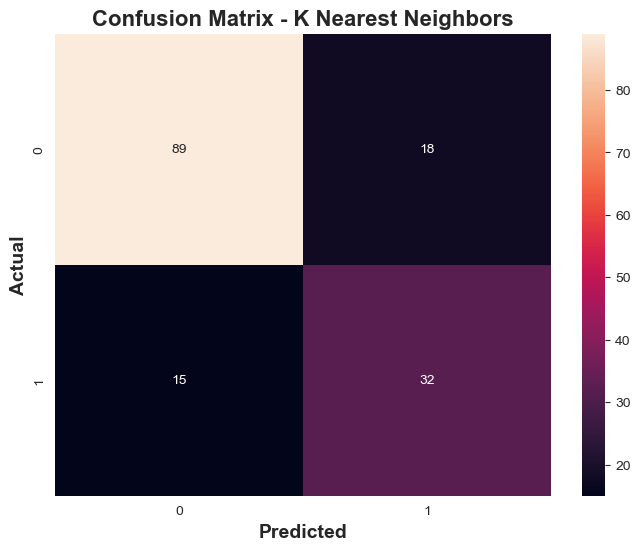

In [215]:
# Generate and display the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True)
plt.title('Confusion Matrix - K Nearest Neighbors', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

### NAIVE BAYES

In [216]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gaussian Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}

# Perform GridSearchCV with Gaussian Naive Bayes model
nb_grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

# Fit the best model using the training data
best_nb_model = nb_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [217]:
# Make predictions using the best Gaussian Naive Bayes model
nb_predictions = best_nb_model.predict(X_test)

# Display classification report
print("Classification Report for Naive Bayes:\n", classification_report(y_test, nb_predictions))

# Calculate and display F1 score, precision, and recall
print("\nF1 Score:\n", f1_score(y_test, nb_predictions))
print("\nPrecision Score:\n", precision_score(y_test, nb_predictions))
print("\nRecall Score:\n", recall_score(y_test, nb_predictions))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


F1 Score:
 0.5813953488372093

Precision Score:
 0.6410256410256411

Recall Score:
 0.5319148936170213


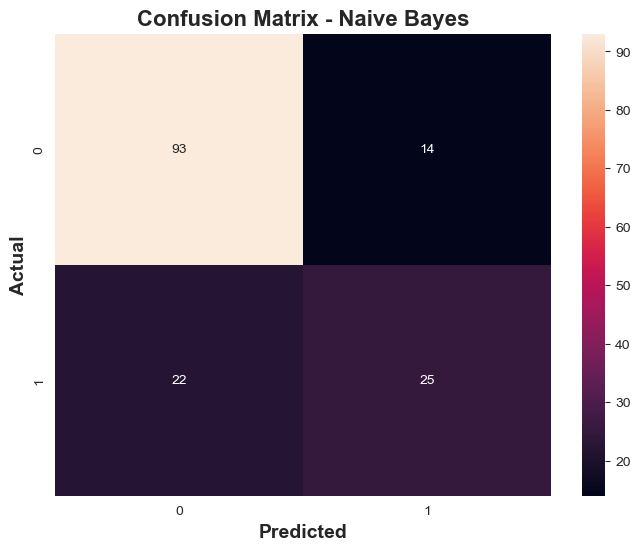

In [218]:
# Generate and display the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True)
plt.title('Confusion Matrix - Naive Bayes', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

### LOGISTIC REGRESSION

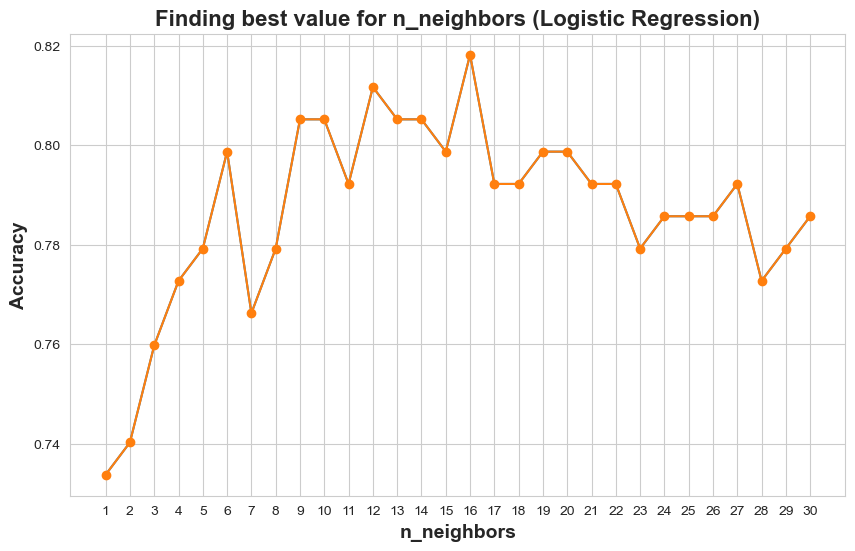

Highest accuracy value: 0.8181818181818182


In [219]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model
model_logreg = LogisticRegression(random_state=42)
model_logreg.fit(X_train, y_train)

# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis_logreg = list(range(1, 31))
acc_logreg = []

for i in range(1, 31):
    knn_model_logreg = KNeighborsClassifier(n_neighbors=i) 
    knn_model_logreg.fit(X_train, y_train)
    prediction_logreg = knn_model_logreg.predict(X_test)
    acc_logreg.append(metrics.accuracy_score(prediction_logreg, y_test))

plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(X_axis_logreg, acc_logreg)
plt.plot(X_axis_logreg, acc_logreg, marker='o', linestyle='-')
plt.xticks(range(1, 31))  # Rotate x-axis labels for better readability
plt.title("Finding best value for n_neighbors (Logistic Regression)", fontsize=16, fontweight='bold')
plt.xlabel("n_neighbors", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.show()

print('Highest accuracy value:', max(acc_logreg))

In [220]:
# Predict using Logistic Regression model
logreg_predictions = model_logreg.predict(X_test)

# Display classification report
print("Classification Report for Logistic Regression:\n", classification_report(y_test, logreg_predictions))

# Calculate and display F1 score, precision, and recall
print("\nF1 Score:\n", f1_score(y_test, logreg_predictions))
print("\nPrecision Score:\n", precision_score(y_test, logreg_predictions))
print("\nRecall Score:\n", recall_score(y_test, logreg_predictions))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154


F1 Score:
 0.627906976744186

Precision Score:
 0.6923076923076923

Recall Score:
 0.574468085106383


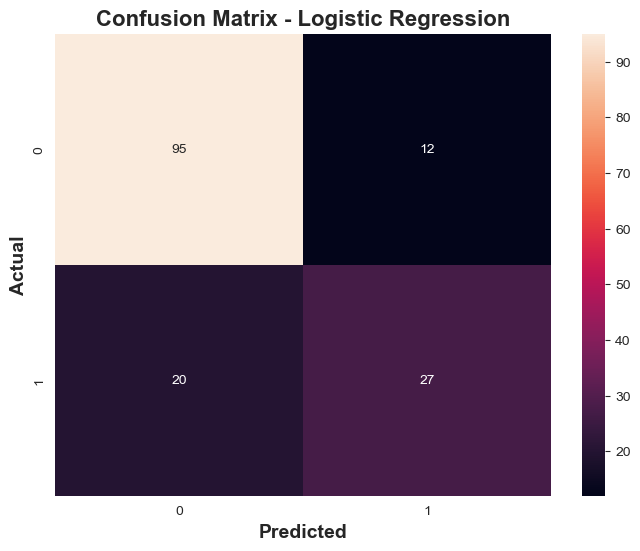

In [221]:
# Generate and display the confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, logreg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

### SUPPORT VECTOR MACHINE

In [222]:
from sklearn.model_selection import RepeatedStratifiedKFold as RSKF
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.svm import SVC as SVM
from sklearn.metrics import classification_report as CR
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import f1_score as F1, precision_score as PS, recall_score as RS

# Create SVC model
model_svm = SVM()

# Define hyperparameters to tune
kernels = ['poly', 'rbf', 'sigmoid']
C_values = [50, 10, 1.0, 0.1, 0.01]
gammas = ['scale']

# Define grid search
param_grid = dict(kernel=kernels, C=C_values, gamma=gammas)
cv = RSKF(n_splits=10, n_repeats=3, random_state=1)
grid_search = GSCV(estimator=model_svm, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1', error_score=0)

# Fit grid search to data
grid_result = grid_search.fit(X, y)

In [223]:
# Make predictions
svm_predictions = grid_result.predict(X_test)

# Display classification report
print("Classification Report for Support Vector Machine:\n", CR(y_test, svm_predictions))

# Calculate and display F1 score, precision, and recall
print("\nF1 Score:\n", F1(y_test, svm_predictions))
print("\nPrecision Score:\n", PS(y_test, svm_predictions))
print("\nRecall Score:\n", RS(y_test, svm_predictions))

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       107
         1.0       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154


F1 Score:
 0.7032967032967034

Precision Score:
 0.7272727272727273

Recall Score:
 0.6808510638297872


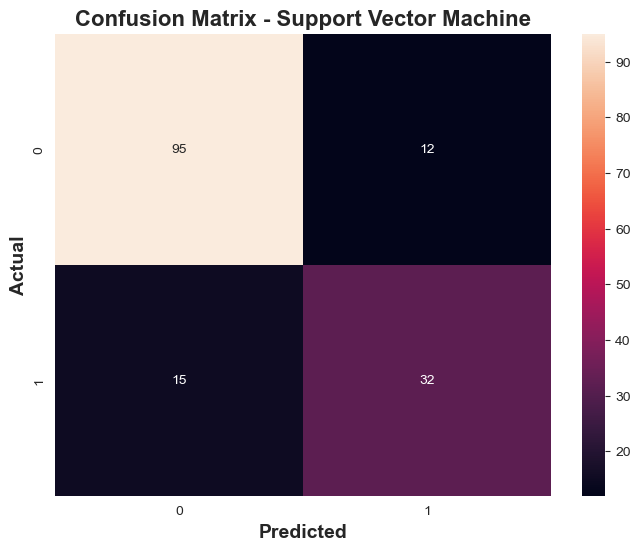

In [224]:
# Generate and display the confusion matrix
conf_matrix_svm = CM(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True)
plt.title('Confusion Matrix - Support Vector Machine', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

### DECISION TREE CLASSIFIER

In [225]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import classification_report as CR
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import f1_score as F1, precision_score as PS, recall_score as RS
from sklearn.model_selection import GridSearchCV as GSCV

# Create Decision Tree Classifier
dt_classifier = DTC(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [5, 10, 20, 25],
    'min_samples_leaf': [10, 20, 50, 100, 120],
    'criterion': ["gini", "entropy"]
}

# Perform grid search
grid_search = GSCV(estimator=dt_classifier, param_grid=param_grid, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")
best_model = grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [226]:
# Make predictions
dt_predictions = best_model.predict(X_test)

# Display classification report
print("Classification Report for Decision Tree:\n", CR(y_test, dt_predictions))

# Calculate and display F1 score, precision, and recall
print("\nF1 Score:\n", F1(y_test, dt_predictions))
print("\nPrecision Score:\n", PS(y_test, dt_predictions))
print("\nRecall Score:\n", RS(y_test, dt_predictions))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


F1 Score:
 0.5675675675675675

Precision Score:
 0.7777777777777778

Recall Score:
 0.44680851063829785


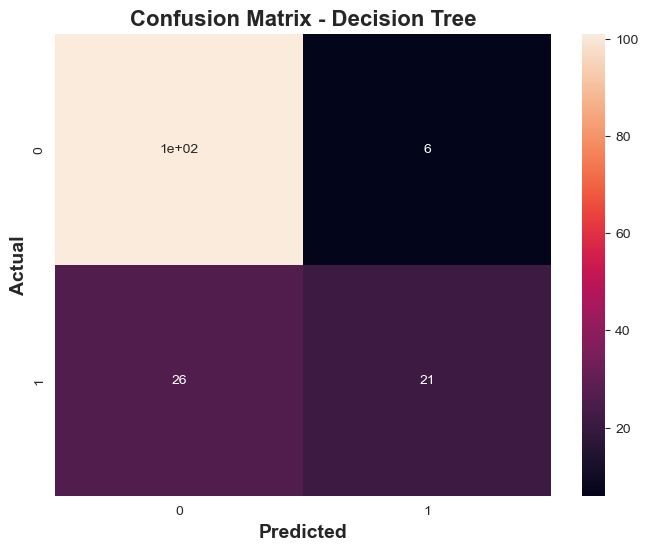

In [227]:
# Generate and display the confusion matrix
conf_matrix_dt = CM(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True)
plt.title('Confusion Matrix - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

### RANDOM FOREST

In [228]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report as CR, confusion_matrix as CM
from sklearn.metrics import f1_score as F1, precision_score as PS, recall_score as RS
from sklearn.model_selection import RepeatedStratifiedKFold as RSKF, GridSearchCV as GSCV

# Define the RandomForestClassifier model
rf_classifier = RFC()

# Define the hyperparameters to tune
n_estimators = [1800]
max_features = ['sqrt', 'log2']

# Define the grid search parameters
param_grid = dict(n_estimators=n_estimators, max_features=max_features)
cv = RSKF(n_splits=10, n_repeats=3, random_state=1)
grid_search = GSCV(estimator=rf_classifier, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

# Fit the grid search to the data
best_model = grid_search.fit(X_train, y_train)

In [229]:
# Make predictions
rf_predictions = best_model.predict(X_test)

# Display classification report
print("Classification Report for Random Forest:\n", CR(y_test, rf_predictions))

# Calculate and display F1 score, precision, and recall
print("\nF1 Score:\n", F1(y_test, rf_predictions))
print("\nPrecision Score:\n", PS(y_test, rf_predictions))
print("\nRecall Score:\n", RS(y_test, rf_predictions))

Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       107
         1.0       0.65      0.66      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154


F1 Score:
 0.6526315789473685

Precision Score:
 0.6458333333333334

Recall Score:
 0.6595744680851063


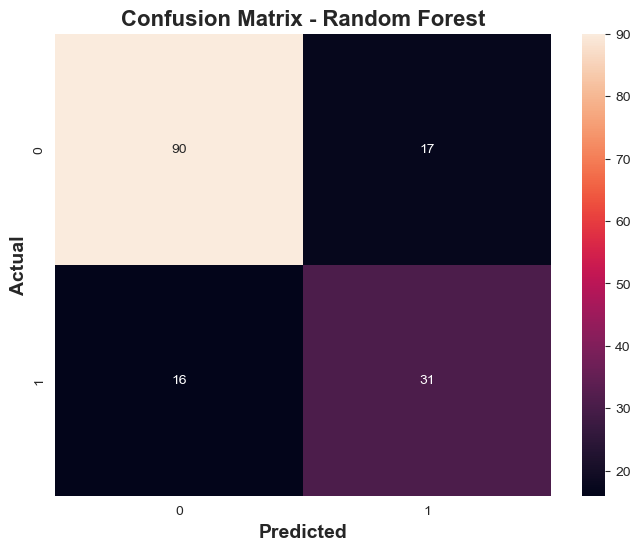

In [230]:
# Generate and display the confusion matrix
conf_matrix_rf = CM(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True)
plt.title('Confusion Matrix - Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

### ACCURACY COMPARISION

In [231]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
accuracy_logreg = accuracy_score(y_test, logreg_pred)
accuracy_knn = accuracy_score(y_test, knn_pred)
accuracy_nb = accuracy_score(y_test, nb_pred)
accuracy_svm = accuracy_score(y_test, svm_pred)
accuracy_dt = accuracy_score(y_test, dt_pred)
accuracy_rf = accuracy_score(y_test, rf_pred)

# Create a dictionary to store accuracies
accuracy_dict = {
    'Logistic Regression': accuracy_logreg,
    'K Nearest Neighbors': accuracy_knn,
    'Naive Bayes': accuracy_nb,
    'Support Vector Machine': accuracy_svm,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf
}

# Display the accuracies
for model, accuracy in accuracy_dict.items():
    print(f"Accuracy of {model}: {accuracy:.4f}")


Accuracy of Logistic Regression: 0.7922
Accuracy of K Nearest Neighbors: 0.8052
Accuracy of Naive Bayes: 0.8247
Accuracy of Support Vector Machine: 0.8247
Accuracy of Decision Tree: 0.7922
Accuracy of Random Forest: 0.7857


#### Based on these results, the Naive Bayes and Support Vector Machine models achieved the highest accuracy of 0.8247